<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Домашняя работа»</b></h3>


## Импорт Библиотек

In [207]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Импорт данных

In [208]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head(6)

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579
5,1,3.0,2.474979e+06,0,21.0,Homemaker,1.001654e+07,1.0,0.326801


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет, выполнить задания и проверить некоторые гипотезы, предложенные ниже, используя только визуализацию.

# Чистка датасета
* Есть ли дубли в данных? Если есть - удалите их (drop_duplicates). 
* Найти и удалить/отфильтровать выбросы по признаку `home_cost`. Таких точек около 5

In [209]:
data_work = data.drop_duplicates(keep='first')

# Создание диапазонов стоимости жилья и подсчёт количества значений в каждом диапазоне:

# Параметры для генерации диапазонов
min_value = data_work['home_cost'].min()
max_value = data_work['home_cost'].max()
step = 500000
print("Параметры:", min_value, max_value, step)

# Генерация диапазонов с использованием np.arange
bins = np.arange(min_value, max_value + step, step)

# Создание категорий на основе диапазонов
data_work["home_cost_bins"] = pd.cut(data_work["home_cost"], bins)

# Подсчёт количества значений в каждом диапазоне
grouped_data = data_work["home_cost_bins"].value_counts()

# sort_index(): Сортирует результат по индексам (т.е. по самим диапазонам).
print(grouped_data.sort_index())

# Сохранение в текстовый файл
# with open("grouped_data.txt", "w") as file:
#     file.write(grouped_data.sort_index().to_string())

data_work = data_work.loc[data_work['home_cost'] < 10600000].copy()  #  удилить выбросы
print("\nРазмеры датасета", data_work.shape)

Параметры: 9824378.17956564 20657915.51438855 500000
home_cost_bins
(9824378.18, 10324378.18]     5223
(10324378.18, 10824378.18]     770
(10824378.18, 11324378.18]       0
(11324378.18, 11824378.18]       0
(11824378.18, 12324378.18]       0
(12324378.18, 12824378.18]       0
(12824378.18, 13324378.18]       0
(13324378.18, 13824378.18]       0
(13824378.18, 14324378.18]       0
(14324378.18, 14824378.18]       0
(14824378.18, 15324378.18]       0
(15324378.18, 15824378.18]       0
(15824378.18, 16324378.18]       0
(16324378.18, 16824378.18]       0
(16824378.18, 17324378.18]       0
(17324378.18, 17824378.18]       0
(17824378.18, 18324378.18]       0
(18324378.18, 18824378.18]       0
(18824378.18, 19324378.18]       0
(19324378.18, 19824378.18]       2
(19824378.18, 20324378.18]       2
(20324378.18, 20824378.18]       1
Name: count, dtype: int64

Размеры датасета (5995, 10)


<div class="alert alert-dark">

Дублей в данных нет (после использования метода `drop_duplicates()` количество строк не уменьшилось).

После группировки видно, что 5 значений значительно превышают остальные, лежащие в диапазоне 0-10600000. По этому удалим эти выбросы.

# Проверка гипотез

# Изучение датасета 
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

<div class="alert alert-info">
    
Перед вами те же гипотезы, которые были в прошлом домашнем задании. Вы уже научились проверять эти утверждения визуально. Теперь же, помимо визуальной состовляющей вам еще нужно применить подходящий статистический критерий, чтобы окончательно доказать или опровергнуть гипотезы на снове этих данных. В качестве уровня значимости принять 5%

* Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?

In [210]:
def show_graf(column2compare, column2selection, value2selection, v_1, v_2, v_all):
    # Определение фигуры с несколькими графиками
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Гистограмма
    bins = 15
    axes[0].hist(v_1[column2compare], bins=bins, alpha=0.9, edgecolor="black", label=value2selection[0])
    axes[0].hist(v_2[column2compare], bins=bins, alpha=0.7, label=value2selection[1])
    axes[0].legend(loc="upper right")
    axes[0].set_title("Гистограмма значений " + column2selection)
    axes[0].set_xlabel(column2compare)
    axes[0].set_ylabel("Количество")

    # Боксплот
    sns.boxplot(x=column2selection, y=column2compare, data=v_all, ax=axes[1])
    axes[1].set_title("Боксплот " + column2selection)
    axes[1].set_xlabel(column2selection)
    axes[1].set_ylabel(column2compare)

    # Настройка отступов между графиками
    plt.tight_layout()

    # Отображение графиков
    plt.show()

    # Bootstrap: повторяющаяся выборка среднего значения
    boot_1d = [
        v_all.sample(frac=1, replace=True).groupby(column2selection)[column2compare].mean()
        for _ in range(1000)
    ]

    # Преобразование в DataFrame
    boot_1d = pd.DataFrame(boot_1d)

    # Плотность распределений (KDE) для бутстрепированных значений
    fig, ax = plt.subplots(figsize=(18, 6))
    boot_1d.plot(kind="density", ax=ax)
    ax.set_title("Плотность распределений средних значений (Bootstrapping)")
    ax.set_xlabel(column2compare)
    ax.set_ylabel("Плотность")
    plt.show()
    return boot_1d


def show_criteria(column2compare, v_1, v_2, boot_1d):
    print("Тест Шапиро на нормальность распределения ", column2compare)
    statistic, p_value = scipy.stats.shapiro(data_work[column2compare])
    print("Статистики=%.3f, p=%.3f" % (statistic, p_value))

    alpha = 0.05
    if p_value > alpha:  # Интерпретируем
        # H_0 = Распределение нормальное
        print("Нормальное распределение (не отвергаем H0)")
    else:
        print("Не нормальное распределения (отвергаем H0)")

    ##############
    print("\nПроверка с использованием t-теста [ttest_ind() из библиотеки scipy.stats]")
    t_value, p_value = scipy.stats.ttest_ind(v_1[column2compare], v_2[column2compare])
    alpha = 0.05
    if p_value > alpha:  # Интерпретируем
        print("Одинаковые распределения (не отвергаем H0)")
    else:
        print("Разные распределения (отвергаем H0)")

    ##############
    print("\nПроверка с использованием U-теста Манна-Уитни [mannwhitneyu() из библиотеки scipy.stats]")
    t_value, p_value = scipy.stats.mannwhitneyu(v_1[column2compare], v_2[column2compare])
    alpha = 0.05
    if p_value > alpha:  # Интерпретируем
        print("Одинаковые распределения (не отвергаем H0)")
    else:
        print("Разные распределения (отвергаем H0)")

    ##############
    print("\nПроверка распределения средних значений с использованием t-теста [ttest_ind() из библиотеки scipy.stats]")
    t_value, p_value = scipy.stats.ttest_ind(boot_1d[value2selection[0]], boot_1d[value2selection[1]])
    alpha = 0.05
    if p_value > alpha:  # Интерпретируем
        print("Одинаковые распределения (не отвергаем H0)")
    else:
        print("Разные распределения (отвергаем H0)")

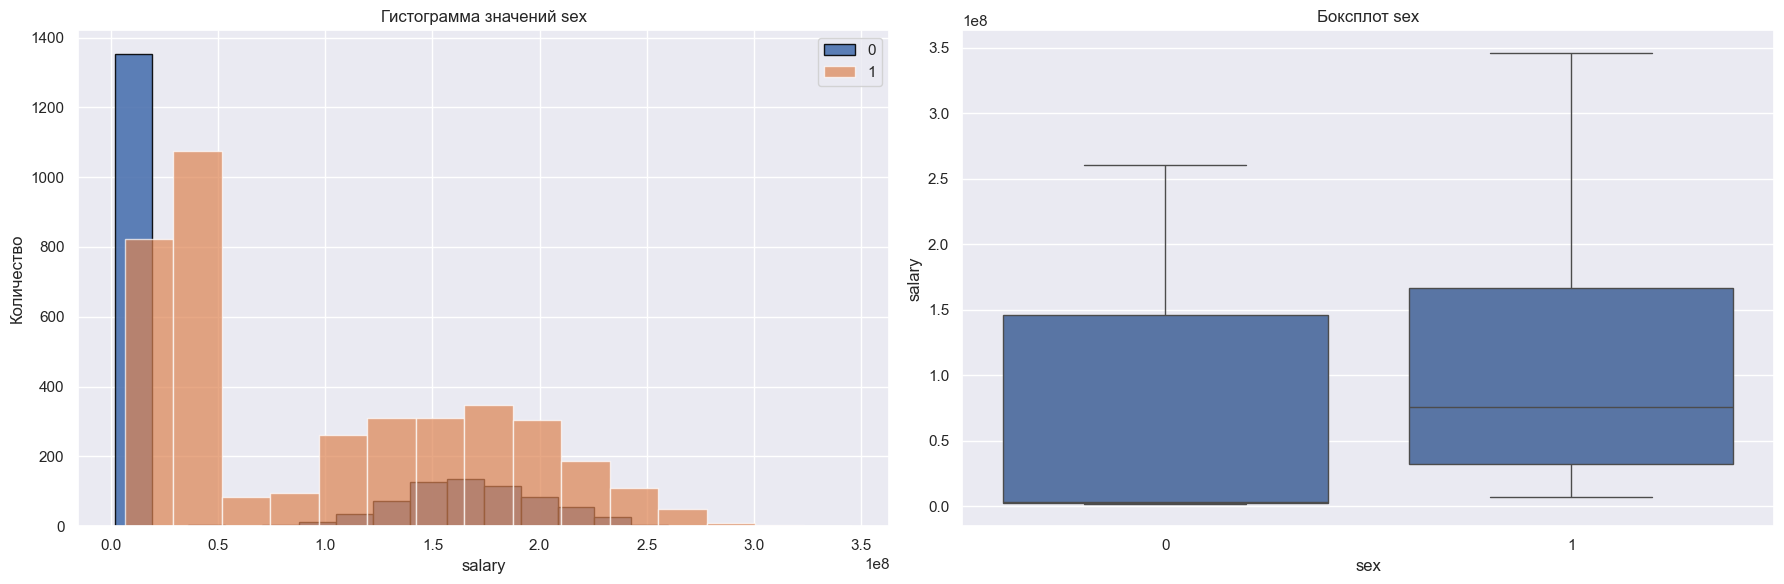

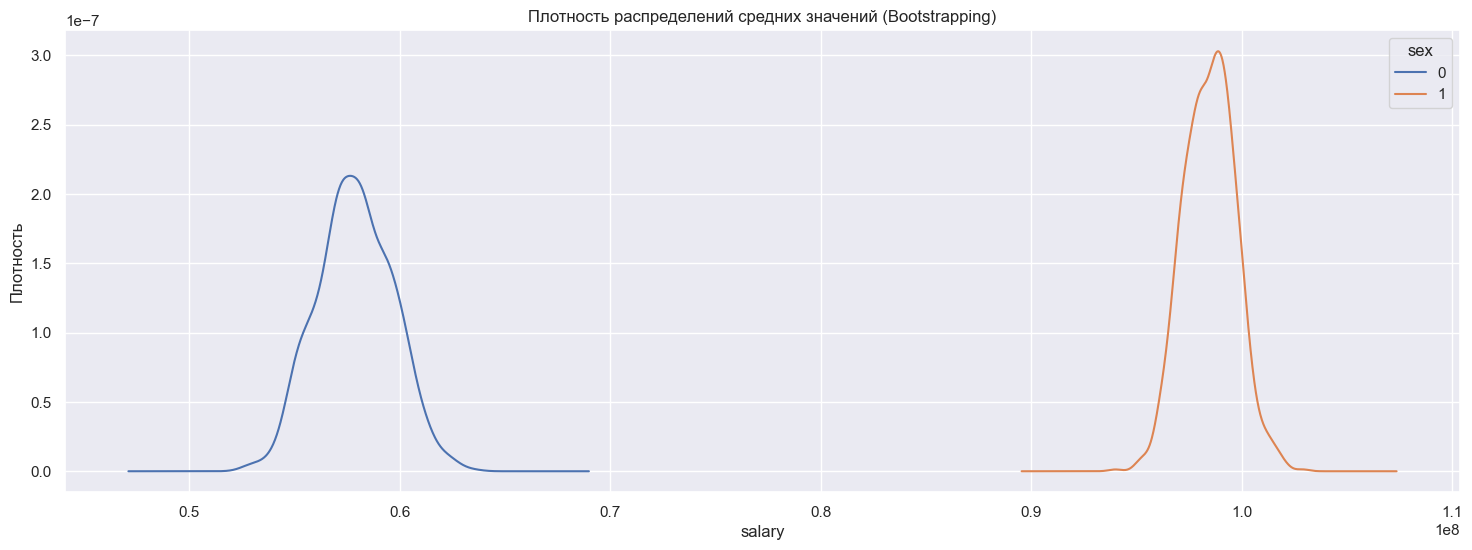

In [211]:
column2compare = "salary"
column2selection = "sex"
value2selection = [0, 1]
v_1 = data_work.loc[data_work[column2selection] == value2selection[0]]
v_2 = data_work.loc[data_work[column2selection] == value2selection[1]]
v_all = data_work[data_work[column2selection].isin(value2selection)]

boot_1d = show_graf(column2compare, column2selection, value2selection, v_1, v_2, v_all)


In [212]:
show_criteria(column2compare, v_1, v_2, boot_1d)

Тест Шапиро на нормальность распределения  salary
Статистики=0.861, p=0.000
Не нормальное распределения (отвергаем H0)

Проверка с использованием t-теста [ttest_ind() из библиотеки scipy.stats]
Разные распределения (отвергаем H0)

Проверка с использованием U-теста Манна-Уитни [mannwhitneyu() из библиотеки scipy.stats]
Разные распределения (отвергаем H0)

Проверка распределения средних значений с использованием t-теста [ttest_ind() из библиотеки scipy.stats]
Разные распределения (отвергаем H0)


/usr/lib64/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<div class="alert alert-warning">

Отвергаем нулевую гипотезу, что женщины в среднем имеют более высокую зарплату, чем мужчины

* Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

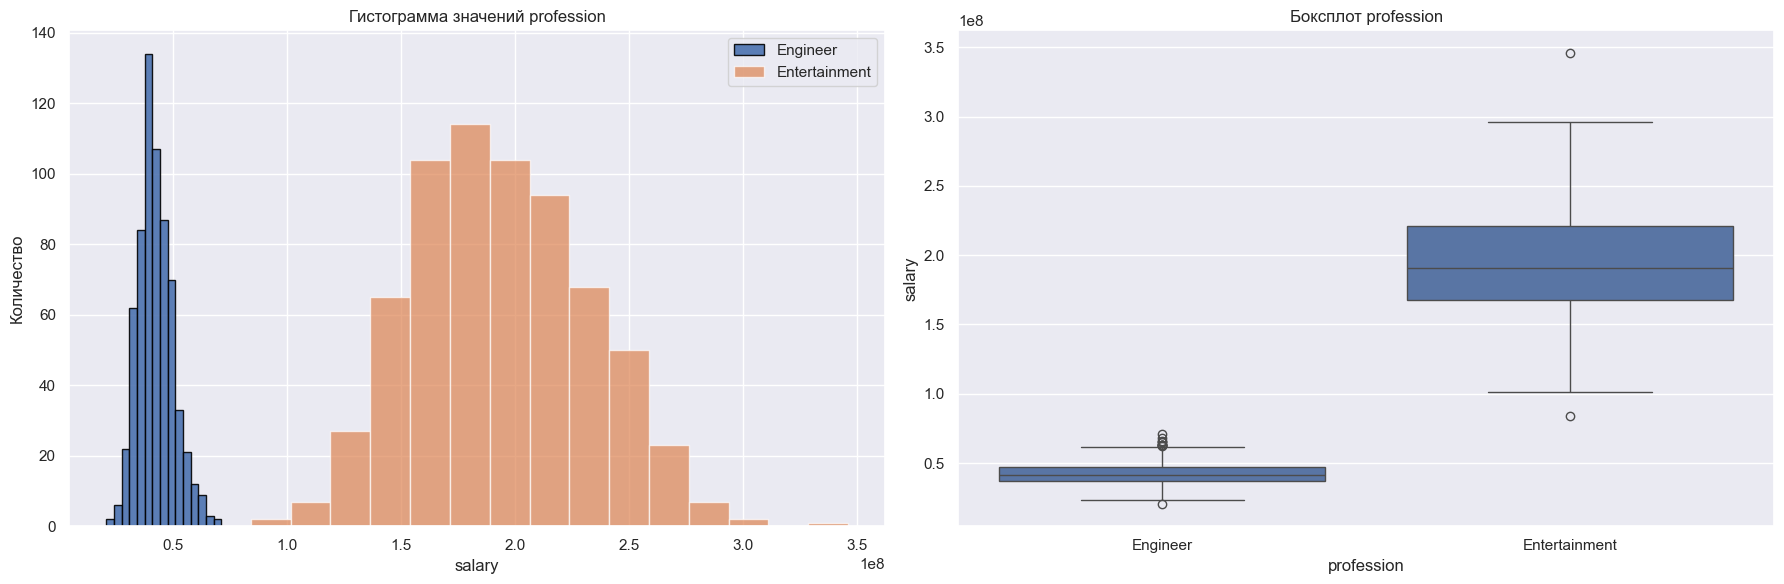

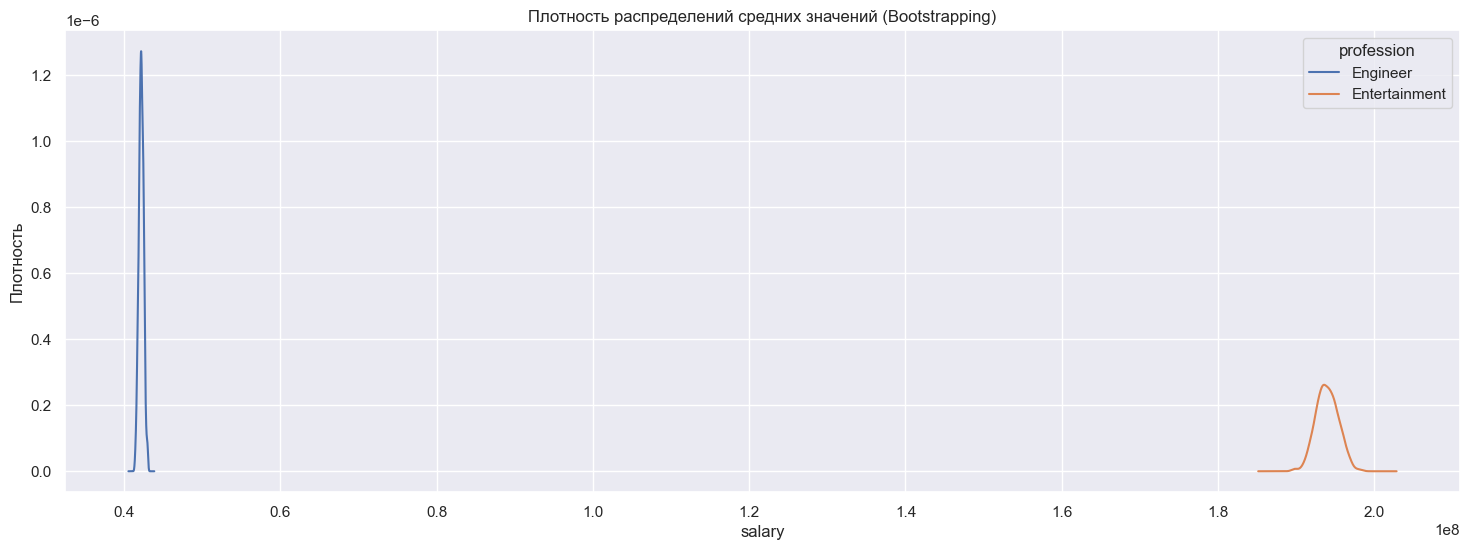

In [213]:
column2compare = "salary"
column2selection = "profession"
value2selection = ["Engineer", "Entertainment"]
v_1 = data_work.loc[data_work[column2selection] == value2selection[0]]
v_2 = data_work.loc[data_work[column2selection] == value2selection[1]]
v_all = data_work[data_work[column2selection].isin(value2selection)]

boot_1d = show_graf(column2compare, column2selection, value2selection, v_1, v_2, v_all)

In [214]:
show_criteria(column2compare, v_1, v_2, boot_1d)

Тест Шапиро на нормальность распределения  salary
Статистики=0.861, p=0.000
Не нормальное распределения (отвергаем H0)

Проверка с использованием t-теста [ttest_ind() из библиотеки scipy.stats]
Разные распределения (отвергаем H0)

Проверка с использованием U-теста Манна-Уитни [mannwhitneyu() из библиотеки scipy.stats]
Разные распределения (отвергаем H0)

Проверка распределения средних значений с использованием t-теста [ttest_ind() из библиотеки scipy.stats]
Разные распределения (отвергаем H0)


/usr/lib64/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<div class="alert alert-warning">

Отвергаем нулевую гипотезу, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)

* Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей?

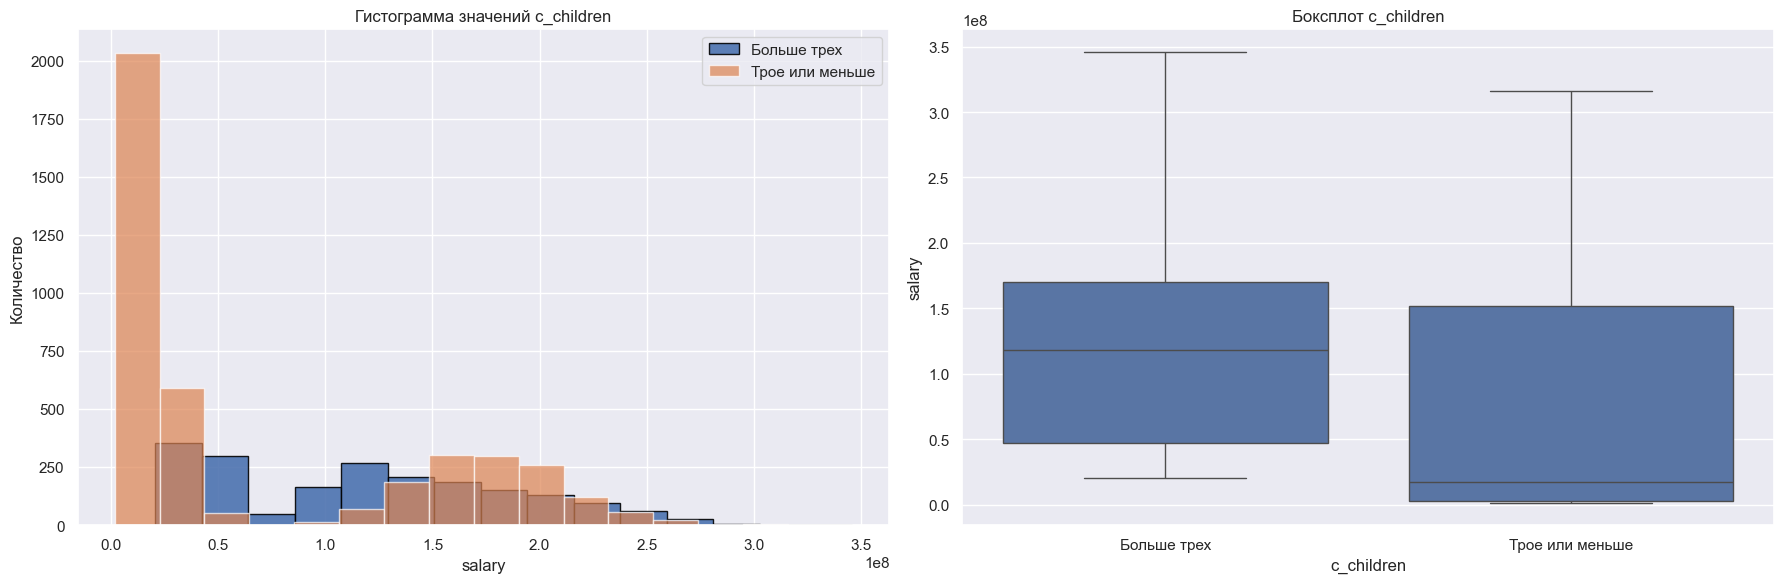

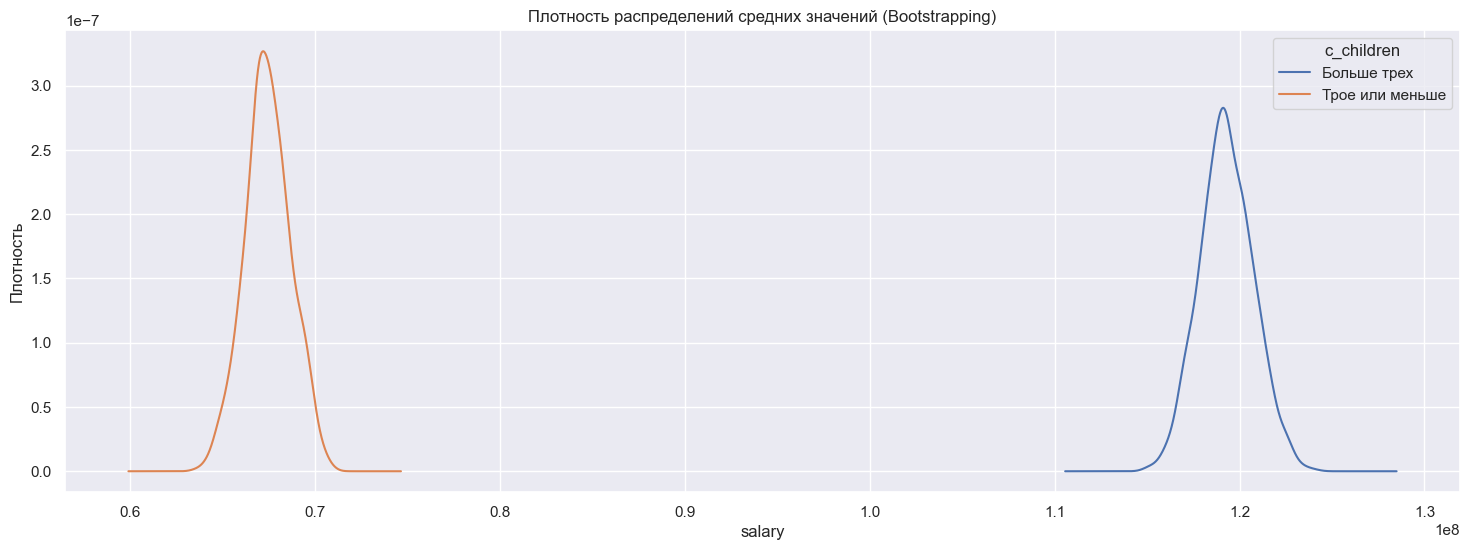

In [215]:
data_work['c_children'] = [
    "Больше трех" if x > 3 else "Трое или меньше" for x in data_work["children"]
]

column2compare = "salary"
column2selection = "c_children"
value2selection = ["Больше трех", "Трое или меньше"]
v_1 = data_work.loc[data_work[column2selection] == value2selection[0]]
v_2 = data_work.loc[data_work[column2selection] == value2selection[1]]
v_all = data_work[data_work[column2selection].isin(value2selection)]

boot_1d = show_graf(column2compare, column2selection, value2selection, v_1, v_2, v_all)


In [216]:
show_criteria(column2compare, v_1, v_2, boot_1d)

Тест Шапиро на нормальность распределения  salary
Статистики=0.861, p=0.000
Не нормальное распределения (отвергаем H0)

Проверка с использованием t-теста [ttest_ind() из библиотеки scipy.stats]
Разные распределения (отвергаем H0)

Проверка с использованием U-теста Манна-Уитни [mannwhitneyu() из библиотеки scipy.stats]
Разные распределения (отвергаем H0)

Проверка распределения средних значений с использованием t-теста [ttest_ind() из библиотеки scipy.stats]
Разные распределения (отвергаем H0)


/usr/lib64/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<div class="alert alert-warning">

Разные распределения. Подтверждаем гипотезу, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей

* Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?

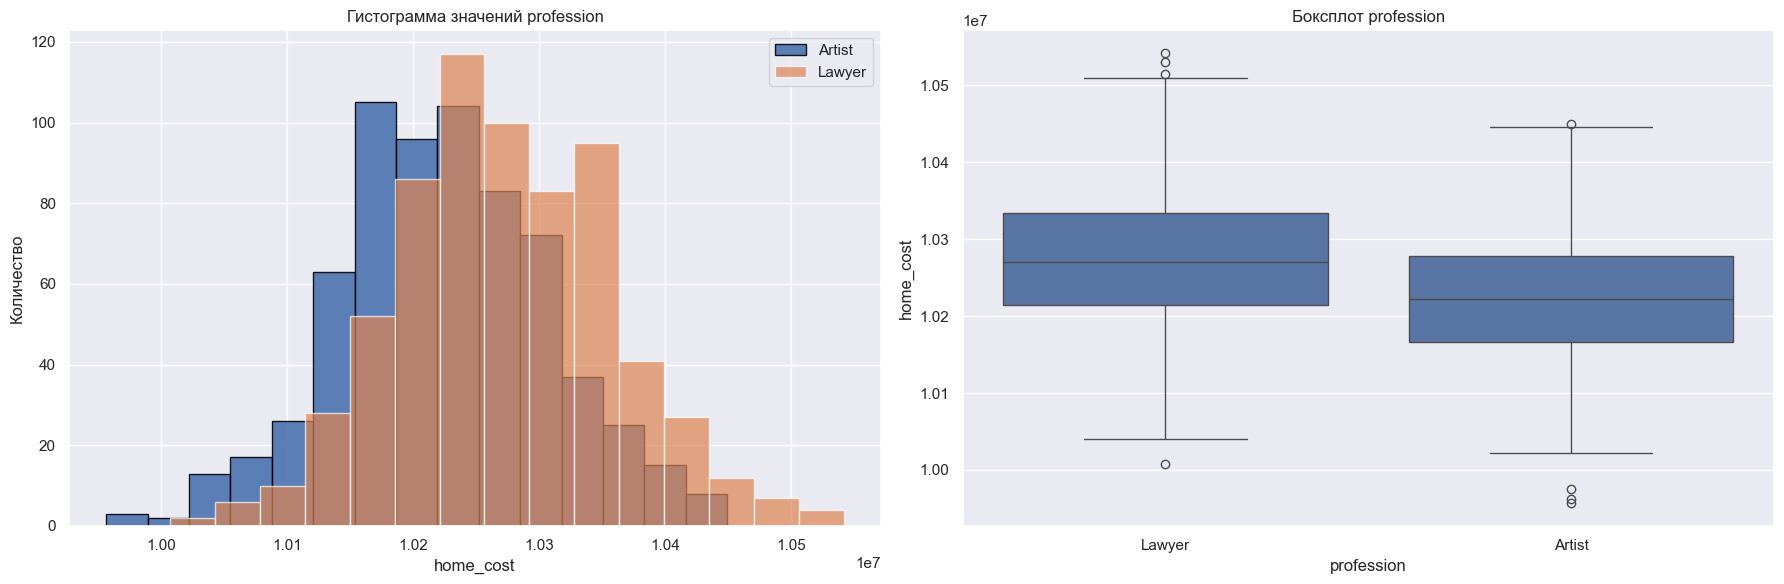

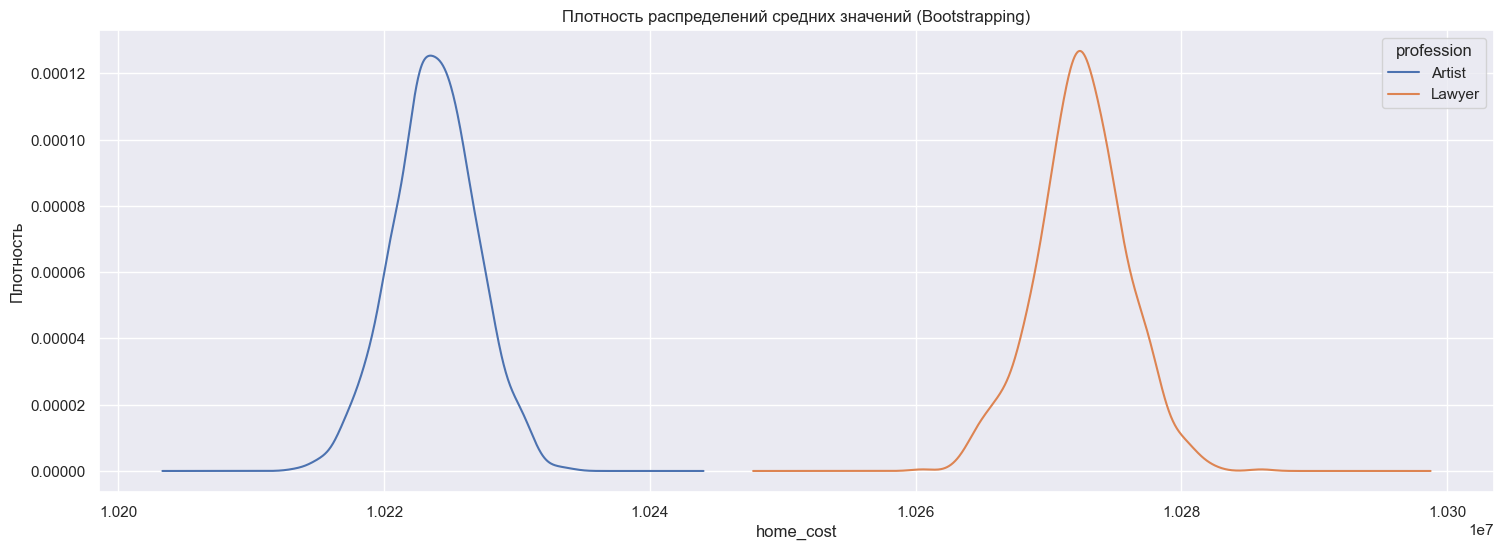

In [217]:
column2compare = "home_cost"
column2selection = "profession"
value2selection = ["Artist", "Lawyer"]
v_1 = data_work.loc[data_work[column2selection] == value2selection[0]]
v_2 = data_work.loc[data_work[column2selection] == value2selection[1]]
v_all = data_work[data_work[column2selection].isin(value2selection)]

boot_1d = show_graf(column2compare, column2selection, value2selection, v_1, v_2, v_all)

In [218]:
show_criteria(column2compare, v_1, v_2, boot_1d)

Тест Шапиро на нормальность распределения  home_cost
Статистики=0.995, p=0.000
Не нормальное распределения (отвергаем H0)

Проверка с использованием t-теста [ttest_ind() из библиотеки scipy.stats]
Разные распределения (отвергаем H0)

Проверка с использованием U-теста Манна-Уитни [mannwhitneyu() из библиотеки scipy.stats]
Разные распределения (отвергаем H0)

Проверка распределения средних значений с использованием t-теста [ttest_ind() из библиотеки scipy.stats]
Разные распределения (отвергаем H0)


/usr/lib64/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<div class="alert alert-warning">

Разные распределения. Подтверждаем гипотезу, что художники (Artist) живут в домах, которые в среднем дешевле, чем дома адвокатов (Lawyer)

* Правда ли, что недвижимость у тех, кто когда либо был в браке в среднем дороже, чем у тех, кто никогда не был в браке?


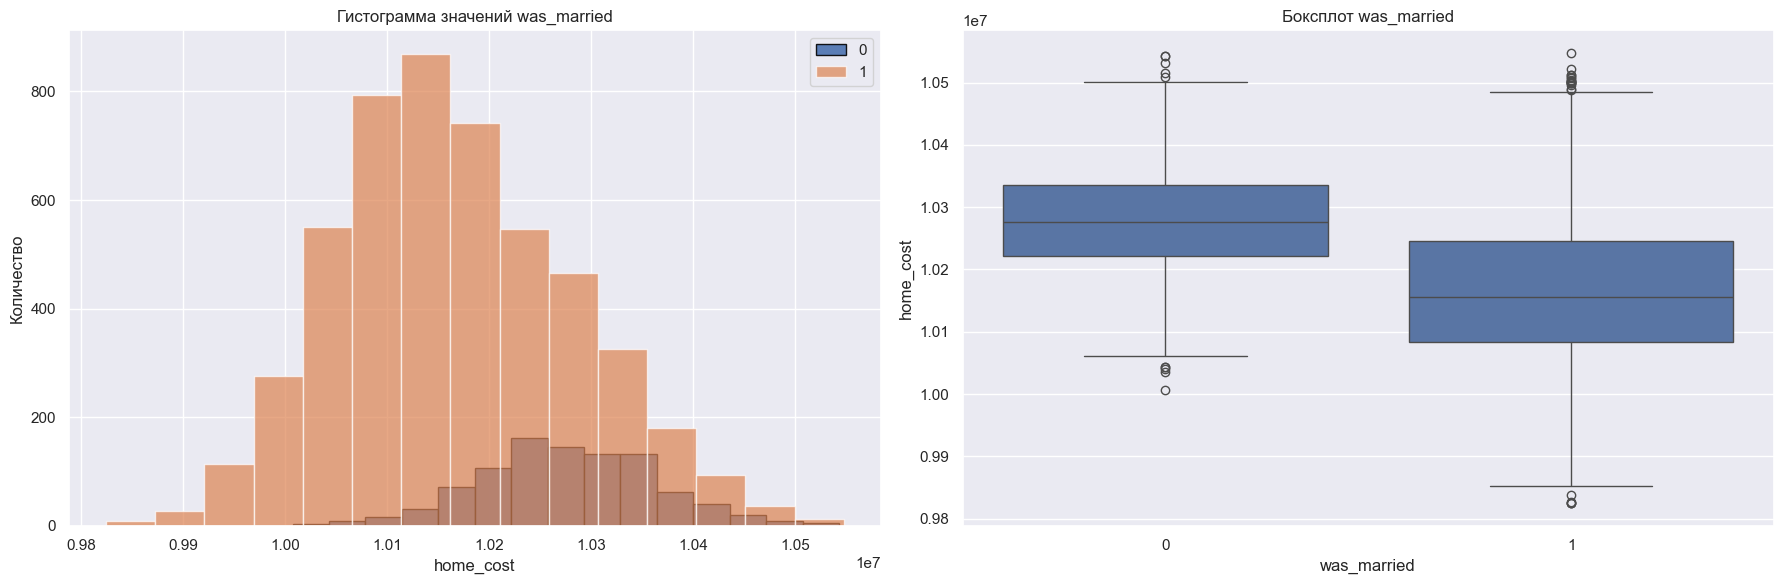

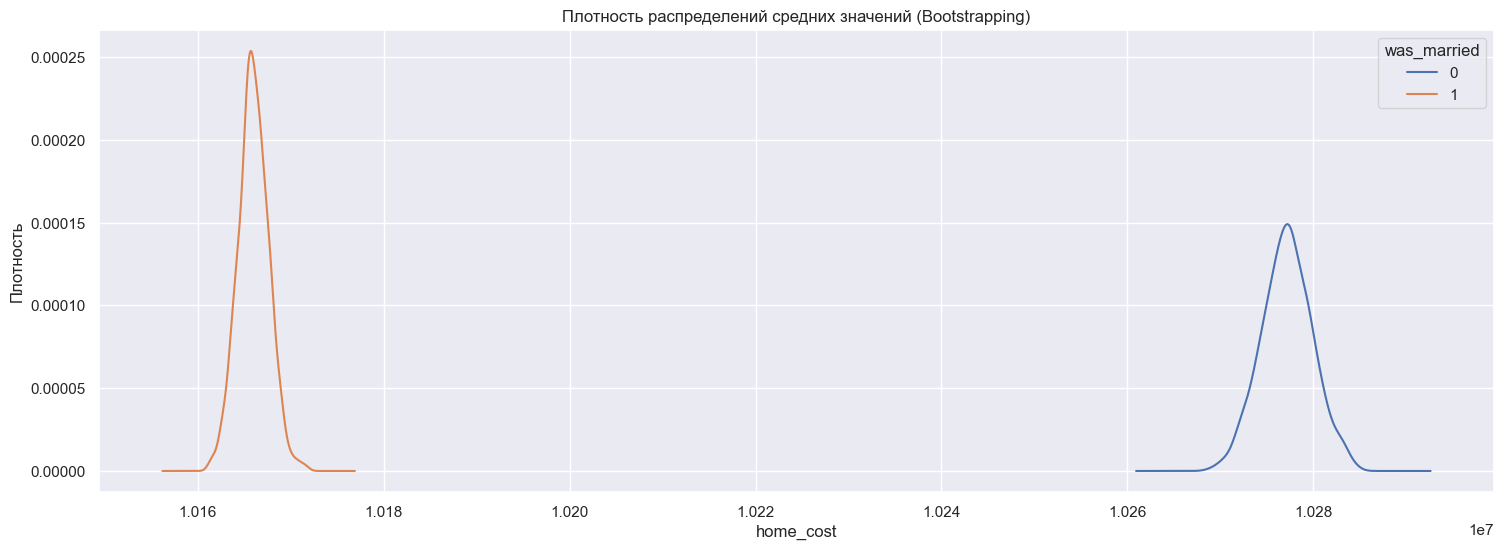

In [219]:
column2compare = "home_cost"
column2selection = "was_married"
value2selection = [0, 1]
v_1 = data_work.loc[data_work[column2selection] == value2selection[0]]
v_2 = data_work.loc[data_work[column2selection] == value2selection[1]]
v_all = data_work[data_work[column2selection].isin(value2selection)]

boot_1d = show_graf(column2compare, column2selection, value2selection, v_1, v_2, v_all)

In [220]:
show_criteria(column2compare, v_1, v_2, boot_1d)

Тест Шапиро на нормальность распределения  home_cost
Статистики=0.995, p=0.000
Не нормальное распределения (отвергаем H0)

Проверка с использованием t-теста [ttest_ind() из библиотеки scipy.stats]
Разные распределения (отвергаем H0)

Проверка с использованием U-теста Манна-Уитни [mannwhitneyu() из библиотеки scipy.stats]
Разные распределения (отвергаем H0)

Проверка распределения средних значений с использованием t-теста [ttest_ind() из библиотеки scipy.stats]
Разные распределения (отвергаем H0)


/usr/lib64/python3.12/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<div class="alert alert-warning">

Разные распределения. Подтверждаем гипотезу, что недвижимость у тех, кто когда-либо был в браке в среднем дешевле, чем у тех, кто никогда не был в браке

* Правда ли, что мужчины в среднем чаще бывают в браке, чем женщины?

**Подсказка** - Составьте матрицу смежности и воспользуйтесь критерием хи-квадрат из библиотеки scipy

In [221]:
# Создание таблицы сопряжённости
contingency_table = pd.crosstab(data_work["sex"], data_work["was_married"])

# Вывод таблицы сопряжённости
print("Таблица сопряжённости:")
print(contingency_table)

# Применение критерия хи-квадрат
chi2, p, dof, expected = scipy.stats.chi2_contingency(contingency_table)

# Вывод результатов
print(f"\nСтатистика хи-квадрат: {chi2}")
print(f"p-value: {p}")
print(f"Степени свободы: {dof}")
print("Ожидаемые значения:")
print(expected)

# Интерпретация результата
alpha = 0.05
if p < alpha:
    print("\nзависимость между полом и наличием брака существует.")
else:
    print("\nзависимость между полом и наличием брака не выявлена.")

Таблица сопряжённости:
was_married    0     1
sex                   
0            670  1358
1            278  3689

Статистика хи-квадрат: 681.036720317365
p-value: 3.97625859922564e-150
Степени свободы: 1
Ожидаемые значения:
[[ 320.6912427 1707.3087573]
 [ 627.3087573 3339.6912427]]

зависимость между полом и наличием брака существует.


<div class="alert alert-warning">

Зависимость между полом и наличием брака существует. Мужчины в среднем чаще бывают в браке, чем женщины
 

Правда ли, что женщины с зарплатой выше медианной в среднем более счастливые, чем мужчины с зарплатой, которая выше средней?

In [222]:
# Медианная зарплата и средняя зарплата
median_salary = data_work["salary"].median()
mean_salary = data_work["salary"].mean()

# Группы:
# Женщины с зарплатой выше медианной
women_above_median = data_work[(data_work["sex"] == 0) & (data_work["salary"] > median_salary)]

# Мужчины с зарплатой выше средней
men_above_mean = data_work[(data_work["sex"] == 1) & (data_work["salary"] > mean_salary)]

# Среднее значение счастья для каждой группы
mean_happyness_women = women_above_median["happyness"].mean()
mean_happyness_men = men_above_mean["happyness"].mean()

print(f"Среднее счастье женщин с зарплатой выше медианной: {mean_happyness_women}")
print(f"Среднее счастье мужчин с зарплатой выше средней: {mean_happyness_men}")

# Применение t-теста Стьюдента для сравнения средних уровней счастья
t_stat, p_value = scipy.stats.ttest_ind(women_above_median["happyness"], men_above_mean["happyness"], equal_var=False)

print(f"\nT-статистика: {t_stat}")
print(f"P-значение: {p_value}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("\nразличие в уровне счастья статистически значимо.")
else:
    print("\nстатистически значимого различия в уровне счастья нет.")


Среднее счастье женщин с зарплатой выше медианной: 0.33953478386539976
Среднее счастье мужчин с зарплатой выше средней: 0.5559373105766131

T-статистика: -40.12018759659843
P-значение: 1.627707438976648e-235

различие в уровне счастья статистически значимо.


<div class="alert alert-warning">

Зависимость между уровнем счастья женщин с зарплатой выше медианной и мужчин с зарплатой выше средней существует.

Не правда, что женщины с зарплатой выше медианной в среднем более счастливые, чем мужчины с зарплатой, которая выше средней
